In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio
completo que maximice tu utilidad
.
Considera una tasa libre de riesgo de 5.0%
,
un premio
por riesgo de mercado de 10.0%
y un nivel de aversión al riesgo A=

In [3]:
market = pd.read_excel("./Prueba.xlsx",parse_dates=["DATE"],index_col="DATE")
market.columns = [col.replace("MF Equity", "").strip() for col in market.columns]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [4]:
market.columns

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC*',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA*', 'ORBIA*',
       'PE&OLES*', 'GRUMAB', 'RA', 'WALMEX*', 'BOLSAA', 'LIVEPOLC', 'GENTERA*',
       'IENOVA*', 'CUERVO*', 'ELEKTRA*', 'BBAJIOO', 'ALPEKA', 'MEGACPO',
       'GCC*', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA*', 'MEXBOL INDEX'],
      dtype='object')

In [6]:
data=market[['GRUMAB', 'RA', 'BBAJIOO','BSMXB','PE&OLES*', 'GFINBURO', 'AMXL', 'MEXBOL INDEX']]
N = len(market)

In [7]:
data.head()

,GRUMAB,RA,BBAJIOO,BSMXB,PE&OLES*,GFINBURO,AMXL,MEXBOL INDEX
DATE,,,,,,,,
2016-01-01,241.75,88.34,NaN,30.25,177.22,31.10,12.12,42977.50
2016-01-04,236.43,89.12,NaN,29.46,175.90,29.95,12.03,42113.70
2016-01-05,233.10,88.06,NaN,29.72,176.45,29.60,11.97,42041.68
2016-01-06,243.38,87.01,NaN,29.67,172.68,29.19,11.74,41691.19
2016-01-07,243.66,85.63,NaN,28.50,172.94,28.52,11.34,40661.57


1.Rendimiento esperado diario y anual bajo los siguientes modelos:


a.Modelo de rendimiento promedio constant

In [8]:
rend = data.pct_change().dropna()
print("El rendimiento diario bajo el modelo de rendimientos constantes es "  )
rend.mean()

El rendimiento diario bajo el modelo de rendimientos constantes es 


GRUMAB         -0.000211
RA              0.000168
BBAJIOO         0.000249
BSMXB          -0.000248
PE&OLES*       -0.000769
GFINBURO       -0.000273
AMXL            0.000151
MEXBOL INDEX   -0.000111
dtype: float64

In [9]:

rend_ports = rend.mean() * 252
print("El rendimiento anual bajo el modelo de rendimientos constantes es "  )
rend_ports

El rendimiento anual bajo el modelo de rendimientos constantes es 


GRUMAB         -0.053139
RA              0.042244
BBAJIOO         0.062645
BSMXB          -0.062517
PE&OLES*       -0.193689
GFINBURO       -0.068713
AMXL            0.038057
MEXBOL INDEX   -0.027950
dtype: float64

b.Modelo CAPM

i.¿Cuál es la beta de cada acción?

ii.Clasifica las acciones en defensivas y agresivas

In [10]:
rend["MEXBOL INDEX"]

DATE
2017-06-08   -0.003805
2017-06-09   -0.000117
2017-06-12    0.000958
2017-06-13   -0.002075
2017-06-14    0.005389
                ...   
2019-12-30   -0.013647
2019-12-31   -0.002668
2020-01-01    0.000000
2020-01-02    0.020583
2020-01-03    0.004222
Name: MEXBOL INDEX, Length: 672, dtype: float64

In [11]:
#primoro obtengo alphas y betas
acciones=['GRUMAB', 'RA', 'BBAJIOO', 'BSMXB','PE&OLES*', 'GFINBURO', 'AMXL']
alpha=[]
beta=[]

for i in range(len(acciones)):
    sec = acciones[i]

    asset = rend[[sec]]
    ipc_ret = rend["MEXBOL INDEX"] # factor 1: mercado
    ipc_ret.index = ipc_ret.index.values.astype("datetime64[D]")

    F = pd.concat([asset, ipc_ret], axis=1).dropna()


    lr = LinearRegression()

    lr.fit(F[["MEXBOL INDEX"]], F[sec])

    beta.append(lr.coef_[0])
    alpha.append(lr.intercept_)

beta=pd.DataFrame(beta)
alpha=pd.DataFrame(alpha)

In [12]:
beta.index=acciones
#<1 defensivo

In [13]:
r=.05  
premio=.1
A=3


E_r=r+premio*beta
E_r.columns=["rendimiento anual"]
E_r["rendimiento diario"]=E_r["rendimiento anual"]/252

In [14]:
print(" los rendimientos anuales y diarios bajo el Modelo CAPM son:" )
E_r

 los rendimientos anuales y diarios bajo el Modelo CAPM son:


,rendimiento anual,rendimiento diario
GRUMAB,0.112748,0.000447
RA,0.119906,0.000476
BBAJIOO,0.133312,0.000529
BSMXB,0.149036,0.000591
PE&OLES*,0.170329,0.000676
GFINBURO,0.153518,0.000609
AMXL,0.164149,0.000651


In [15]:
print(" Las betas de cada accion y su clasificacion son:" )
beta.columns=["beta"]
beta["tipo"]=[ "Defensiva" if beta["beta"][i]<1 else "Agresiva" for i in range(len(beta)) ]
beta

 Las betas de cada accion y su clasificacion son:


,beta,tipo
GRUMAB,0.627485,Defensiva
RA,0.699065,Defensiva
BBAJIOO,0.833118,Defensiva
BSMXB,0.990356,Defensiva
PE&OLES*,1.203287,Agresiva
GFINBURO,1.035179,Agresiva
AMXL,1.141493,Agresiva


2.Matriz varianza-covarianza

In [16]:

print("diaria" )
rend.cov()

diaria


,GRUMAB,RA,BBAJIOO,BSMXB,PE&OLES*,GFINBURO,AMXL,MEXBOL INDEX
GRUMAB,0.000177,0.000025,0.000047,0.000034,0.000066,0.000047,0.000040,0.000046
RA,0.000025,0.000221,0.000070,0.000061,0.000064,0.000053,0.000038,0.000051
BBAJIOO,0.000047,0.000070,0.000210,0.000079,0.000065,0.000072,0.000060,0.000061
BSMXB,0.000034,0.000061,0.000079,0.000279,0.000075,0.000099,0.000062,0.000072
PE&OLES*,0.000066,0.000064,0.000065,0.000075,0.000459,0.000102,0.000085,0.000088
GFINBURO,0.000047,0.000053,0.000072,0.000099,0.000102,0.000284,0.000069,0.000076
AMXL,0.000040,0.000038,0.000060,0.000062,0.000085,0.000069,0.000193,0.000083
MEXBOL INDEX,0.000046,0.000051,0.000061,0.000072,0.000088,0.000076,0.000083,0.000073


In [17]:

print("anual" )
rend.cov()*252

anual


,GRUMAB,RA,BBAJIOO,BSMXB,PE&OLES*,GFINBURO,AMXL,MEXBOL INDEX
GRUMAB,0.044617,0.006186,0.011970,0.008581,0.016666,0.011914,0.010145,0.011546
RA,0.006186,0.055697,0.017556,0.015423,0.016131,0.013354,0.009500,0.012863
BBAJIOO,0.011970,0.017556,0.052902,0.019938,0.016255,0.018106,0.015118,0.015330
BSMXB,0.008581,0.015423,0.019938,0.070252,0.019016,0.024849,0.015566,0.018223
PE&OLES*,0.016666,0.016131,0.016255,0.019016,0.115560,0.025820,0.021491,0.022141
GFINBURO,0.011914,0.013354,0.018106,0.024849,0.025820,0.071452,0.017458,0.019048
AMXL,0.010145,0.009500,0.015118,0.015566,0.021491,0.017458,0.048554,0.021004
MEXBOL INDEX,0.011546,0.012863,0.015330,0.018223,0.022141,0.019048,0.021004,0.018401


Utilizando los rendimientos esperados bajo el modelo CAPM, construye:
3. Frontera de carteras de mínima varianza y frontera eficiente / graficar

In [71]:
def port_rend(weights):#E_r["rendimiento anual"]
    E_p =(E_r["rendimiento anual"] @ weights) 
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() *252) @ weights)
    return S_p

def sum_weights(weights):
    return weights.sum() -1

def rend_esperado(w, E):
    return port_rend(w) - E # == 0

In [72]:
#rmin = port_rend(wp0,rend)
rmin = E_r["rendimiento anual"].min()
rmax = E_r["rendimiento anual"].max()

rend_maxs = np.linspace(rmin,rmax)

In [73]:
N, M  = rend[['GRUMAB', 'RA', 'BBAJIOO', 'BSMXB','PE&OLES*', 'GFINBURO', 'AMXL']].shape
w0 = np.random.randn(M)

In [74]:
pesos_optimos = []
for e in rend_maxs:
    constraints = [
        {"type":"eq", "fun":sum_weights},
        {"type":"eq", "fun":lambda w: rend_esperado(w, e)}
    ]
    port1 = minimize(port_vol, w0, constraints=constraints, args=rend[['GRUMAB', 'RA', 'BBAJIOO', 'BSMXB','PE&OLES*', 'GFINBURO', 'AMXL']])
    w_opt = port1.x
    pesos_optimos.append(w_opt)

In [76]:

r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w))
    v_opt.append(port_vol(w,rend[['GRUMAB', 'RA', 'BBAJIOO', 'BSMXB','PE&OLES*', 'GFINBURO', 'AMXL']]))
    
r_opt = np.array(r_opt)
v_opt = np.array(v_opt)



Frontera de carteras eficientes y en ROJO cartera de minima varianza


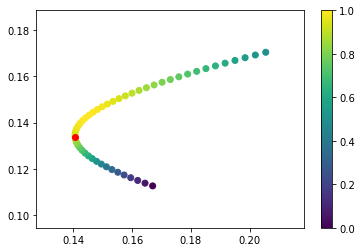

In [84]:
print("Frontera de carteras eficientes y en ROJO cartera de minima varianza")
plt.scatter(v_opt,r_opt, c=r_opt/v_opt)
plt.scatter(v_opt.min(),r_opt[np.argmin(v_opt)],c="red")
plt.colorbar();

4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)


In [86]:
rf=.05 
def min_func_sharpe(weights):
        return - (port_rend(weights) - rf)/ port_vol(weights,rend[['GRUMAB', 'RA', 'BBAJIOO', 'BSMXB','PE&OLES*', 'GFINBURO', 'AMXL']])

constraints = [
    {"type":"eq", "fun":sum_weights}
]
f_sharpe = minimize(min_func_sharpe,w0, constraints=constraints)

In [89]:
w_sharpe = f_sharpe.x  # pesos del PORTAFOLIO que maximizan sharpe
e_sharpe = port_rend(w_sharpe)
vol_sharpe = port_vol(w_sharpe, rend[['GRUMAB', 'RA', 'BBAJIOO', 'BSMXB','PE&OLES*', 'GFINBURO', 'AMXL']])

In [96]:

print("el portafolio riesgoso optimo es aquel con rendimiento esperado %f" % e_sharpe)

print("y volatilidad  %f" % vol_sharpe)

print(" con los pesos ")
w_sharpe

el portafolio riesgoso optimo es aquel con rendimiento esperado 0.147870
y volatilidad  0.151409
 con los pesos 


array([0.12245845, 0.10356846, 0.0925747 , 0.12315889, 0.08647391,
       0.11485837, 0.35690723])

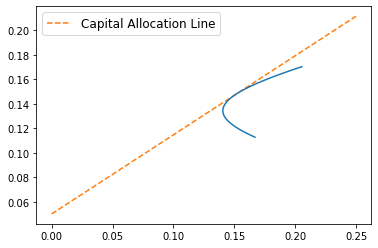

In [90]:
sigma_c = np.linspace(0,0.25)
sharpe = rf + sigma_c*(e_sharpe - rf)/vol_sharpe
plt.plot(sigma_c, sharpe, linestyle="--",c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

5. Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo

In [91]:
A =3
y_star = (e_sharpe - rf) / (A * vol_sharpe ** 2)
y_star

1.4230715071319193

In [92]:
E_util = rf+y_star*(e_sharpe-rf)
V_util = y_star*vol_sharpe

In [103]:
print("Mi porcentaje a invertir en el riesgoso optimo es %f" %(y_star*100))
print("Mi porcentaje a invertir en el activo libre de riesgo es %f" %((1-y_star)*100) )
print("es decir pido prestado a esa tasa")

Mi porcentaje a invertir en el riesgoso optimo es 142.307151
Mi porcentaje a invertir en el activo libre de riesgo es -42.307151
es decir pido prestado a esa tasa


Deep Learning:

6. ¿En qué escenarios ocuparías una red neuronal?

Cuando tienes un gran volumen de datos.

Cuando modelos mas simples no ofrecen un desempeno util para el problema o necesitas ganar mejoras en el desempeno sin importar el cost computacional.




7. ¿En qué escenarios no ocuparías una red neuronal?

Si el fenomeno que estoy modelando obtiene un desempeno alto o aceptable para el caso con un metodo mas simple.

Si la red neuronal no anade valor al desempeno por el costo computacional que implica.

Si tengo pocos datos que no son suficientes para entrenar una red neuronal.


8. Menciona tres funciones de activación para una red neuronal feed-forward

a) Identidad f(x) = x 

b) Funcion sigmoidal f(x)=1/(1+exp(-1))

c) ReLu f(x)=max(0,x)

9. ¿Qué es el método de backpropagation ?

Es un algoritmo utilizado para obtener el gradiente de la funcion de costo en una red neuronal , el cual comienza el calculo en la ultima capa de la red y termina en la primera.

10.¿En qué difiere una red neuronal feed-forward de una red neuronal convolucional?

Una red feed forward es el modelo mas simple en la que cada neurona de cada capa esta conectada unicamente con neuronas de la capa siguiente de tal manera que no crea ciclos, en cambio las convicionales en cada capa se aplica un filtro sobre los datos de forma que se pretende extraer los patrones de cada muestra, esos filtros son los conocidos como convoluciones. Sin embargo el modo en que parende un red convolucional puede ser feed forward